# Scikit-learn Isolation Forest on Mulcross Database

## The Mulcross Database

### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualisation and Data Management Tools imported")

Visualisation and Data Management Tools imported


For Running the Local Version of the Notebook, or re-uploading the Database in ../sample_data of Colab, please download from: <br>
https://drive.google.com/file/d/1MR2ssKqkCMEOXeHRuI7pFo3Iz02Cx7VT/view?usp=sharing

In [ ]:
mulcrossData = pd.read_csv('mulcross.csv');

In [ ]:
#Show the first 5 Elements of the Data
mulcrossData.head()

,V1,V2,V3,V4,Target
0,-0.203950,0.363011,1.013766,0.187131,'Normal'
1,-0.761118,2.436424,0.681846,0.654366,'Normal'
2,-0.209979,1.131098,-0.282180,-0.202210,'Normal'
3,0.836812,0.650342,-0.426900,-0.305281,'Normal'
4,0.454204,1.560128,-0.204841,0.219233,'Normal'


### About the Mulcross Data Set
The synthetic Data Generator, Mulcross, Generates a **multi-variate normal distribution** with a scalable number of anomaly clusters.
In this setting, the basic settings are as follow: 
* **Contamination Ratio** = 10%
* **Distance Factor** = 2
* **Number of Anomaly Clusters** = 2 



In [ ]:
mulcrossData.describe()

,V1,V2,V3,V4
count,2.621440e+05,2.621440e+05,2.621440e+05,2.621440e+05
mean,1.869197e-13,3.053569e-14,1.335155e-13,8.777654e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.620516e+00,-4.254628e+00,-2.836998e+00,-3.167357e+00
25%,-6.829707e-01,-8.252399e-01,-4.600873e-01,-6.373091e-01
50%,5.883664e-02,-1.007720e-02,-2.210133e-03,-1.816787e-01
75%,7.227089e-01,7.020211e-01,4.609398e-01,3.353681e-01
max,4.425919e+00,4.574595e+00,2.838117e+00,2.673695e+00


In [ ]:
print(f"Number of missing data = {mulcrossData.isna().sum().sum()}")

Number of missing data = 0


Les données étant synthétiquement générées il est normale qu'il n'existe aucune donnée vide ou N/A

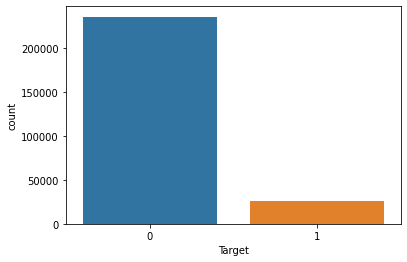

In [ ]:
# Map the Categorical Target column to int values; 1 if anomaly and 0 else
mulcrossData.Target = mulcrossData.Target.map(lambda target: 0 if (target == "'Normal'" or target == 0) else 1)
sns.countplot(x = 'Target', data = mulcrossData)

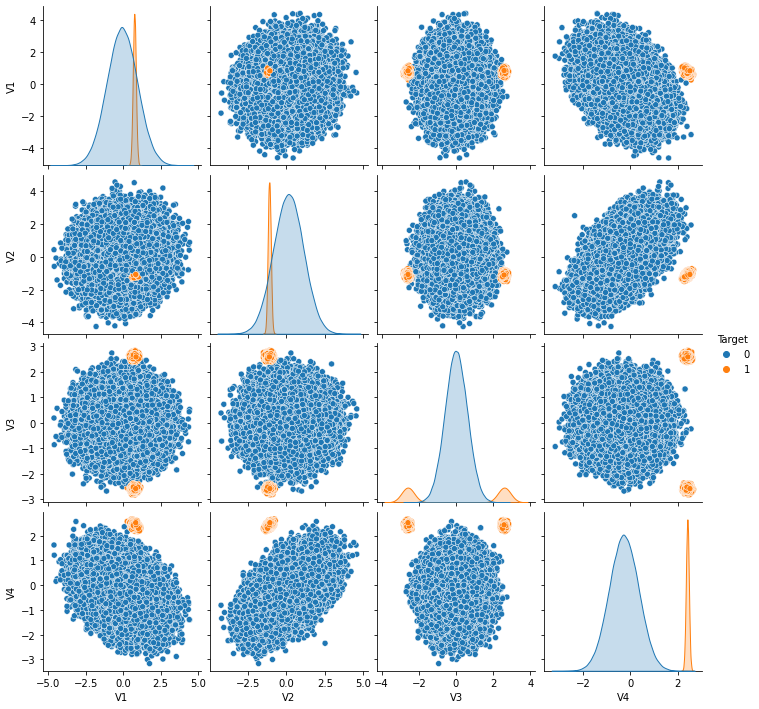

In [ ]:
# Checking for correlation between Variables
sns.pairplot(data = mulcrossData, hue= "Target")

We can clearly see that the plots of V2-V4, V3-V4 and V1-V4 seem to isolate the anomalies very well. A thourough analysis of these pairs could be further investigated, but it is not the goal of the notebook here.

We are simply looking at the data to get an idea about which points or anomalies iForest is best suited at indentifying.


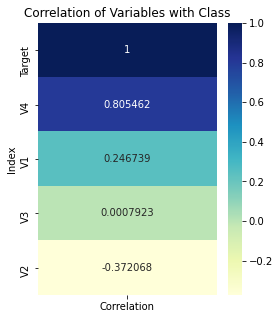

In [ ]:
# Get the correlation between every variable and The Target Class
corr = mulcrossData.corrwith(mulcrossData.Target).reset_index()

# Prerpare data for plotting
corr.columns = ['Index','Correlation']
corr = corr.set_index('Index')
corr = corr.sort_values(by = ['Correlation'], ascending = False)

# Plotting the Correlation in a heatmap
plt.figure(figsize=(4,5))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with Class")
plt.show()

V4 Seems to be mostly correlated with the Target, we should keep in mind though that in the context of actual anomaly detection we wouldnt have knowledge of this as iForest is an unsupervised algorithm

### 3D Visualization of the Mulcross Dataset

#### Principal Component Analysis w/ Sci-kit

Principal Component Analaysis, PCA, consist of finding k vectors onto which we project all of the Data whilst preserving the most of the information in the data. <br>
PCA is very useful in Visualization as we can plot an n-dimensional dataset into 3 or 2 vectors which we can plot.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
features = ['V1', 'V2', 'V3', 'V4']

# Separating out the features
X = mulcrossData.loc[:, features].values

# Seperating out the target
y = mulcrossData.loc[:,['Target']].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

# Recombining the Data into one DataFrame
standardizedData = pd.DataFrame(X, columns=['V1','V2','V3','V4'])
standardizedData['Target'] = pd.DataFrame(y, columns=["Target"])

In [ ]:
# The data should have a mean of 0 and a standard deviation of 1
standardizedData.describe()

,V1,V2,V3,V4,Target
count,2.621440e+05,2.621440e+05,2.621440e+05,2.621440e+05,262144.000000
mean,-9.379196e-18,4.683076e-17,-7.684452e-17,-2.064431e-18,0.099998
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.299999
min,-4.620524e+00,-4.254636e+00,-2.837004e+00,-3.167363e+00,0.000000
25%,-6.829720e-01,-8.252415e-01,-4.600882e-01,-6.373103e-01,0.000000
50%,5.883675e-02,-1.007722e-02,-2.210137e-03,-1.816790e-01,0.000000
75%,7.227103e-01,7.020224e-01,4.609407e-01,3.353687e-01,0.000000
max,4.425928e+00,4.574603e+00,2.838122e+00,2.673700e+00,1.000000


In [ ]:
standardizedData.head()

,V1,V2,V3,V4,Target
0,-0.203950,0.363012,1.013768,0.187131,0
1,-0.761120,2.436428,0.681847,0.654367,0
2,-0.209979,1.131100,-0.282181,-0.202211,0
3,0.836814,0.650343,-0.426901,-0.305282,0
4,0.454205,1.560131,-0.204841,0.219233,0


In [ ]:
# Importing PCA
from sklearn.decomposition import PCA

In [ ]:
# Instantiating PCA with number of components =  for 3D visualization
pca = PCA(n_components = 3)

# Apply PCA
principalComponents = pca.fit_transform(standardizedData.loc[:,standardizedData.columns != 'Target'])

# Create New DataFrame for resulting data
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3'])

# Recombining with Target Column
principalDf['Target'] = standardizedData.Target

principalDf.head()

,PC1,PC2,PC3,Target
0,-0.310814,-0.663325,-0.224912,0
1,0.570420,-0.037428,-1.755755,0
2,0.794010,0.392115,-0.478378,0
3,1.115232,-0.155565,-0.220674,0
4,1.147667,-0.101660,-1.102661,0


#### 3D Visualizaition with Axes3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Split Anomalous and Normal points for visualization

normalPoints = principalDf.loc[principalDf.Target == 0]

anomalies = principalDf.loc[principalDf.Target == 1]

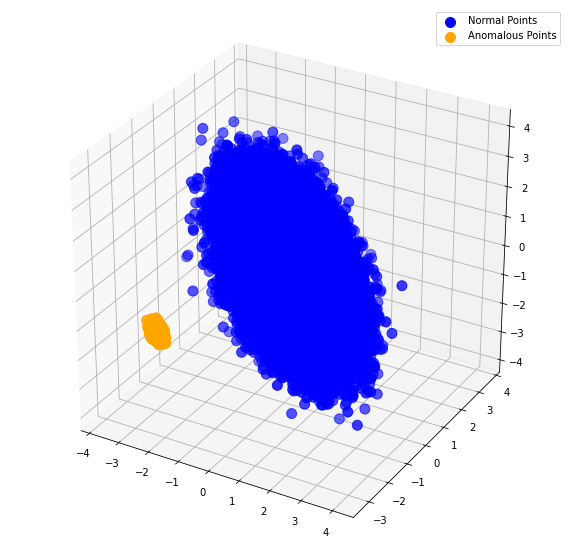

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(normalPoints.PC1, normalPoints.PC2,normalPoints.PC3, c = "blue", label = "Normal Points", s = 100)
ax.scatter(anomalies.PC1, anomalies.PC2,anomalies.PC3, c = "orange", label = "Anomalous Points", s = 100)
ax.legend()


We can clearly see that the anomalies are very distinguished from the rest of the data. </br>
In the later sections of the notebook, while comparing iForest to other anomaly detection techniques, and on other databases, we will make sure to plot the 3D representation of data to have an idea to see how they react to harder-to-distinguish points.

## Isolation Forest in Action: the Scikit-learn Implementation

### Training

In [ ]:
# Imports
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [ ]:
# Overview on the mulcross dataset
mulcrossData.head()

,V1,V2,V3,V4,Target
0,-0.203950,0.363011,1.013766,0.187131,0
1,-0.761118,2.436424,0.681846,0.654366,0
2,-0.209979,1.131098,-0.282180,-0.202210,0
3,0.836812,0.650342,-0.426900,-0.305281,0
4,0.454204,1.560128,-0.204841,0.219233,0


In [ ]:
# Splitting the Data
y = mulcrossData.Target
X = mulcrossData.drop(['Target'],axis = 1)

# Have a look at the data
X.head()

# Being in the context of unsupervised anomaly detection, it would thus be useless to split the data into train and test sets

,V1,V2,V3,V4
0,-0.203950,0.363011,1.013766,0.187131
1,-0.761118,2.436424,0.681846,0.654366
2,-0.209979,1.131098,-0.282180,-0.202210
3,0.836812,0.650342,-0.426900,-0.305281
4,0.454204,1.560128,-0.204841,0.219233


In [ ]:
# Isolation Forest with Default Parameter; N trees = 100; but for the max_samples we will use 64 for a better swamping and masking mitigation
model = IsolationForest(random_state=0, contamination=0.1,n_estimators=100,max_samples=256)

In [ ]:
model.fit(X);

### Evaluation

In [ ]:
pred = model.predict(X)
score = - model.score_samples(X)

dfScore = pd.DataFrame(score)

dfScore.describe()

# Format Prediction as Target Class
pred[pred == 1] = 0
pred[pred == -1 ] = 1

,0
count,262144.000000
mean,0.453529
std,0.059606
min,0.367337
25%,0.405372
50%,0.436973
75%,0.490636
max,0.692202


#### F1 Score and Confusion Matrix

In [ ]:
# Confusion Matrix and F1 score
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

cnf_matrix = confusion_matrix(y,pred)
f1 = f1_score(y,pred)
accuracy = accuracy_score(y,pred)

print(f"% of anomalies = {(pred[pred == 1].size / pred.size) * 100} %")

print(f"The accuracy score is: {accuracy}")

print(cnf_matrix)
print(f"The F score is: {f1}")


% of anomalies = 10.000228881835938 %
The accuracy score is: 0.9295692443847656
[[226698   9232]
 [  9231  16983]]
The F score is: 0.6478475652787579


#### ROC and AUC

In [ ]:
from sklearn.metrics import roc_curve

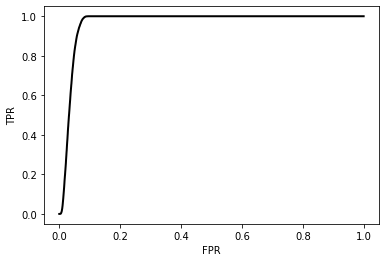

In [ ]:
fpr, tpr, thresholds = roc_curve(y,score)

# Plotting the ROC
plt.plot(fpr, tpr, 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
# AUC Score 

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y,score))

0.9657111194933435


# Comparison with other Anomaly Detection Algorithms

## Mulcross Dataset

In [ ]:
import time

In [ ]:
# rename the data for better visibility
t0 = time.time()
model = IsolationForest(random_state=0, contamination=0.1,n_estimators=100,max_samples=64)
model.fit(X)
pred_iso = model.predict(X)
t1 = time.time()
pred_iso = pd.Series(pred_iso, name = 'Target')

pred_iso[pred_iso == 1] = 0
pred_iso[pred_iso == -1 ] = 1

# X is the dataset without the Target
# y is a DataFrame with only one column: Target

In [ ]:
algorithms = ['Isolation Forest']
aucScores = [roc_auc_score(y,pred_iso)]
times = [t1-t0]

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
# Create the model with its default values
t0 = time.time()

localOutlierFactor = LocalOutlierFactor()
pred_lof = localOutlierFactor.fit_predict(X)

t1 = time.time()

algorithms.append('LOF');
aucScores.append(roc_auc_score(y,pred_lof))
times.append(t1-t0)

In [ ]:
print(roc_auc_score(y,pred_lof))

0.4977217311137533


In [ ]:
# This portion has been commented beacause it takes too long for the mulcross dataset

#from sklearn import svm

#t0 = time.time()

#svmOneClass = svm.OneClassSVM()
#pred_svm = svmOneClass.fit_predict(X)

#t1 = time.time()

#algorithms.append('SVM one class');
#aucScores.append(roc_auc_score(y,pred_svm))
#times.append( t1 - t0)

In [ ]:
compare = pd.DataFrame(data = {'AUC': aucScores, 'Time': times}, index = algorithms)
print(compare)

                       AUC       Time
Isolation Forest  0.967255  14.140437
LOF               0.497722   9.684899
